In [1]:
import random
from quantumnet.components import Network, Host, Controller
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger

Hosts inicializados
Canais inicializados
Pares EPRs adicionados


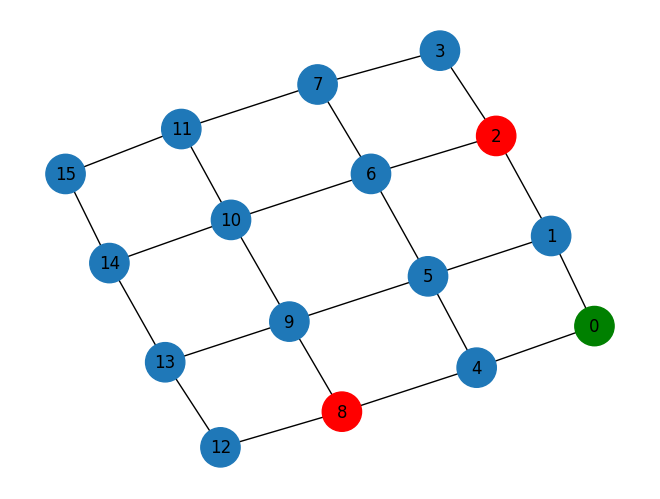

In [2]:
rede = Network()
controller = Controller(rede)

# Chamada corrigida para passar a topologia corretamente
rede.set_ready_topology('grade', 8, 4, 4, clients=[8,2], server=0)  # 8 clientes, 4x4 de topologia
rede.draw()
Logger.activate(Logger)


In [3]:
clientes = [8,2]  

for _ in range(10): 
    alice_id = random.choice(clientes)
    bob_id = 0
    num_qubits = random.randint(3, 6)
    num_gates = random.randint(20, 25)

    request = rede.generate_request(alice_id=alice_id, bob_id=bob_id, num_qubits=num_qubits, num_gates=num_gates)
    controller.receive_request(request)


controller.process_requests()
controller.send_scheduled_requests()


     ┌───┐                                                              
q_0: ┤ T ├───────■────────────────────────X────────X────■─────────■─────
     └───┘┌───┐  │  ┌───┐┌───┐            │        │    │  ┌───┐┌─┴─┐   
q_1: ──■──┤ Y ├──┼──┤ Z ├┤ Y ├─────────■──X───■────X────■──┤ T ├┤ X ├───
       │  └───┘  │  └───┘├───┤   ┌───┐ │      │            └───┘└───┘   
q_2: ──■─────────┼────■──┤ X ├─X─┤ Y ├─■──────┼──────────────X────■───■─
     ┌───┐┌───┐┌─┴─┐┌─┴─┐└─┬─┘ │ ├───┤      ┌─┴─┐┌───┐┌───┐  │    │   │ 
q_3: ┤ Z ├┤ Y ├┤ X ├┤ X ├──■───X─┤ H ├──────┤ X ├┤ S ├┤ T ├──X────■───■─
     └───┘└───┘└───┘└───┘        └───┘      └───┘└───┘└───┘             

2024-12-16 10:02:52,661: Circuito aleatório gerado com 4 qubits e 25 portas. Instruções sobre o circuito.
2024-12-16 10:02:52,662: Instrução: {'operation': 'z', 'qubits': [3]}
2024-12-16 10:02:52,662: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-16 10:02:52,663: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-16 10:02:52,663: Instrução: {'operation': 'cz', 'qubits': [2, 1]}
2024-12-16 10:02:52,664: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-16 10:02:52,665: Instrução: {'operation': 'cx', 'qubits': [0, 3]}
2024-12-16 10:02:52,665: Instrução: {'operation': 'cx', 'qubits': [2, 3]}
2024-12-16 10:02:52,666: Instrução: {'operation': 'cx', 'qubits': [3, 2]}
2024-12-16 10:02:52,666: Instrução: {'operation': 'swap', 'qubits': [3, 2]}
2024-12-16 10:02:52,667: Instrução: {'operation': 'z', 'qubits': [1]}
2024-12-16 10:02:52,667: Instrução: {'operation': 'h', 'qubits': [3]}
2024-12-16 10:02:52,668: Instrução: {'operation': 'y', 'qubits': [1]}
2024-12-16 10:02:52,669: Instruç

2024-12-16 10:02:52,979: Circuito aleatório gerado com 3 qubits e 25 portas. Instruções sobre o circuito.
2024-12-16 10:02:52,980: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-16 10:02:52,981: Instrução: {'operation': 'cz', 'qubits': [1, 0]}
2024-12-16 10:02:52,981: Instrução: {'operation': 'cx', 'qubits': [1, 0]}
2024-12-16 10:02:52,982: Instrução: {'operation': 'swap', 'qubits': [0, 2]}
2024-12-16 10:02:52,983: Instrução: {'operation': 'cx', 'qubits': [1, 0]}
2024-12-16 10:02:52,983: Instrução: {'operation': 'swap', 'qubits': [2, 1]}
2024-12-16 10:02:52,984: Instrução: {'operation': 'cx', 'qubits': [0, 1]}
2024-12-16 10:02:52,984: Instrução: {'operation': 'swap', 'qubits': [1, 0]}
2024-12-16 10:02:52,985: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-16 10:02:52,985: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-16 10:02:52,986: Instrução: {'operation': 'swap', 'qubits': [1, 0]}
2024-12-16 10:02:52,986: Instrução: {'operation': 'cz', 'qubits': [1, 2]}
2024-12-16

          ┌───┐   ┌───┐           ┌───┐                                ┌───┐   »
q_0: ──■──┤ X ├─X─┤ X ├─────■───X─┤ S ├─X──────────X───■─────────────X─┤ S ├─X─»
       │  └─┬─┘ │ └─┬─┘   ┌─┴─┐ │ └───┘ │    ┌───┐ │   │  ┌───┐┌───┐ │ └───┘ │ »
q_1: ──■────■───┼───■───X─┤ X ├─X───────X──■─┤ X ├─┼───■──┤ Y ├┤ H ├─X───────┼─»
     ┌───┐      │       │ ├───┤            │ ├───┤ │ ┌───┐└───┘└───┘         │ »
q_2: ┤ T ├──────X───────X─┤ Y ├────────────■─┤ Z ├─X─┤ H ├───────────────────X─»
     └───┘                └───┘              └───┘   └───┘                     »
«     ┌───┐┌───┐
«q_0: ┤ X ├┤ X ├
«     └───┘└─┬─┘
«q_1: ───────■──
«     ┌───┐     
«q_2: ┤ S ├─────
«     └───┘     


2024-12-16 10:02:53,001: Rota válida encontrada: [2, 1, 0]
2024-12-16 10:02:53,001: Rota reservada: [8, 4, 0] no timeslot 1.
2024-12-16 10:02:53,002: Requisição agendada no mesmo timeslot 1 para rota [8, 4, 0].
2024-12-16 10:02:53,098: Circuito aleatório gerado com 5 qubits e 20 portas. Instruções sobre o circuito.
2024-12-16 10:02:53,099: Instrução: {'operation': 'z', 'qubits': [2]}
2024-12-16 10:02:53,099: Instrução: {'operation': 'h', 'qubits': [2]}
2024-12-16 10:02:53,099: Instrução: {'operation': 'cz', 'qubits': [4, 2]}
2024-12-16 10:02:53,100: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-16 10:02:53,100: Instrução: {'operation': 'cx', 'qubits': [2, 3]}
2024-12-16 10:02:53,101: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-16 10:02:53,101: Instrução: {'operation': 'swap', 'qubits': [2, 4]}
2024-12-16 10:02:53,102: Instrução: {'operation': 'cx', 'qubits': [4, 2]}
2024-12-16 10:02:53,102: Instrução: {'operation': 'cz', 'qubits': [3, 0]}
2024-12-16 10:02:53,103: Instru

                                                      ┌───┐┌───┐┌───┐   
q_0: ─────────────────────────────■────────────────■──┤ Y ├┤ Z ├┤ Z ├─■─
                                  │                │  └───┘└───┘└───┘ │ 
q_1: ─────────────────────────────┼───────────■────■──────────────────┼─
     ┌───┐┌───┐   ┌───┐     ┌───┐ │    ┌───┐  │  ┌───┐     ┌───┐      │ 
q_2: ┤ Z ├┤ H ├─■─┤ Y ├──■──┤ Y ├─┼──X─┤ X ├──┼──┤ T ├──■──┤ T ├──────■─
     └───┘└───┘ │ └───┘┌─┴─┐└───┘ │  │ └─┬─┘  │  └───┘  │  └───┘        
q_3: ───────────┼──────┤ X ├──────■──┼───┼────┼─────────┼───────────────
                │      └───┘         │   │  ┌─┴─┐     ┌─┴─┐┌───┐┌───┐   
q_4: ───────────■────────────────────X───■──┤ X ├─────┤ X ├┤ X ├┤ Y ├───
                                            └───┘     └───┘└───┘└───┘   
                            ┌───┐        ┌───┐┌───┐               
q_0: ────────────■──────────┤ X ├──────X─┤ Y ├┤ Y ├──X────────────
     ┌───┐       │          └─┬─┘      │ └───┘└───┘  │  ┌───┐┌─

2024-12-16 10:02:53,206: Requisição agendada: {'alice_id': 2, 'bob_id': 0, 'num_qubits': 4, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000139365A9450>, 4), 'protocol': 'BFK_BQC', 'slice_path': None} no timeslot 3.
2024-12-16 10:02:53,330: Circuito aleatório gerado com 5 qubits e 24 portas. Instruções sobre o circuito.
2024-12-16 10:02:53,331: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-16 10:02:53,332: Instrução: {'operation': 'cx', 'qubits': [1, 0]}
2024-12-16 10:02:53,332: Instrução: {'operation': 'y', 'qubits': [2]}
2024-12-16 10:02:53,333: Instrução: {'operation': 't', 'qubits': [3]}
2024-12-16 10:02:53,333: Instrução: {'operation': 'cx', 'qubits': [4, 0]}
2024-12-16 10:02:53,333: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-16 10:02:53,334: Instrução: {'operation': 'cz', 'qubits': [0, 4]}
2024-12-16 10:02:53,334: Instrução: {'operation': 's', 'qubits': [0]}
2024-12-16 10:02:53,334: Instrução: {'operation': 'swap', 'qubits': [0,

     ┌───┐     ┌───┐┌───┐   ┌───┐        ┌───┐   ┌───┐                        »
q_0: ┤ X ├─────┤ X ├┤ S ├─■─┤ S ├─X──────┤ X ├─■─┤ X ├────────────────────────»
     └─┬─┘┌───┐└─┬─┘├───┤ │ └───┘ │      └─┬─┘ │ └───┘              ┌───┐     »
q_1: ──■──┤ X ├──┼──┤ H ├─┼───X───┼────────┼───┼───■───X──■─────────┤ X ├─────»
     ┌───┐├───┤  │  └───┘ │   │   │        │   │   │   │  │ ┌───┐   └─┬─┘┌───┐»
q_2: ┤ Y ├┤ Y ├──┼────────┼───┼───┼────────┼───■───■───X──┼─┤ X ├─■───┼──┤ H ├»
     ├───┤└───┘  │        │   │   │        │              │ └───┘ │   │  └───┘»
q_3: ┤ T ├───────┼────────┼───X───┼────────┼──────────────■───────■───■───────»
     └───┘       │        │       │ ┌───┐  │                                  »
q_4: ────────────■────────■───────X─┤ T ├──■──────────────────────────────────»
                                    └───┘                                     »
«        
«q_0: ───
«        
«q_1: ─■─
«      │ 
«q_2: ─┼─
«      │ 
«q_3: ─■─
«        
«q_4: ───
«        
          

2024-12-16 10:02:53,419: Circuito aleatório gerado com 5 qubits e 21 portas. Instruções sobre o circuito.
2024-12-16 10:02:53,420: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-16 10:02:53,420: Instrução: {'operation': 'cz', 'qubits': [3, 1]}
2024-12-16 10:02:53,420: Instrução: {'operation': 't', 'qubits': [3]}
2024-12-16 10:02:53,421: Instrução: {'operation': 'y', 'qubits': [4]}
2024-12-16 10:02:53,421: Instrução: {'operation': 'cz', 'qubits': [3, 2]}
2024-12-16 10:02:53,422: Instrução: {'operation': 'h', 'qubits': [4]}
2024-12-16 10:02:53,422: Instrução: {'operation': 'z', 'qubits': [1]}
2024-12-16 10:02:53,424: Instrução: {'operation': 't', 'qubits': [0]}
2024-12-16 10:02:53,424: Instrução: {'operation': 'x', 'qubits': [1]}
2024-12-16 10:02:53,425: Instrução: {'operation': 'cx', 'qubits': [3, 0]}
2024-12-16 10:02:53,425: Instrução: {'operation': 'z', 'qubits': [4]}
2024-12-16 10:02:53,426: Instrução: {'operation': 'swap', 'qubits': [2, 4]}
2024-12-16 10:02:53,427: Instrução: 

     ┌───┐┌───┐     ┌───┐        ┌───┐                         
q_0: ┤ S ├┤ S ├──X──┤ X ├─■───■──┤ H ├─────────────────■───────
     └───┘├───┤  │  └─┬─┘ │ ┌─┴─┐└───┘     ┌───┐┌───┐┌─┴─┐┌───┐
q_1: ──■──┤ X ├──X────■───┼─┤ X ├───────X──┤ T ├┤ Y ├┤ X ├┤ S ├
     ┌─┴─┐└─┬─┘           │ └───┘┌───┐  │  ├───┤├───┤└───┘└───┘
q_2: ┤ X ├──┼─────────────┼───■──┤ Y ├──X──┤ Y ├┤ S ├──────────
     ├───┤  │  ┌───┐┌───┐ │   │  ├───┤┌───┐├───┤└───┘          
q_3: ┤ S ├──■──┤ H ├┤ H ├─■───■──┤ S ├┤ H ├┤ Z ├───────────────
     └───┘     └───┘└───┘        └───┘└───┘└───┘               
     ┌───┐┌───┐                             ┌───┐             
q_0: ┤ H ├┤ Y ├──■───────X────■───X──X──────┤ X ├───────────■─
     ├───┤└───┘  │       │    │   │  │ ┌───┐└─┬─┘           │ 
q_1: ┤ Z ├───────┼───■───X────■───X──┼─┤ S ├──┼─────────────┼─
     └───┘       │   │               │ └───┘  │       ┌───┐ │ 
q_2: ────────────┼───┼───────────────┼────────■────■──┤ Z ├─┼─
          ┌───┐┌─┴─┐ │               │ ┌───┐┌─

2024-12-16 10:02:53,627: Circuito aleatório gerado com 6 qubits e 24 portas. Instruções sobre o circuito.
2024-12-16 10:02:53,627: Instrução: {'operation': 'h', 'qubits': [5]}
2024-12-16 10:02:53,628: Instrução: {'operation': 'cx', 'qubits': [5, 3]}
2024-12-16 10:02:53,628: Instrução: {'operation': 'z', 'qubits': [1]}
2024-12-16 10:02:53,629: Instrução: {'operation': 'h', 'qubits': [0]}
2024-12-16 10:02:53,630: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-16 10:02:53,630: Instrução: {'operation': 't', 'qubits': [4]}
2024-12-16 10:02:53,632: Instrução: {'operation': 'cz', 'qubits': [5, 1]}
2024-12-16 10:02:53,632: Instrução: {'operation': 'cx', 'qubits': [0, 3]}
2024-12-16 10:02:53,637: Instrução: {'operation': 'swap', 'qubits': [1, 0]}
2024-12-16 10:02:53,643: Instrução: {'operation': 'y', 'qubits': [5]}
2024-12-16 10:02:53,669: Instrução: {'operation': 'cz', 'qubits': [0, 1]}
2024-12-16 10:02:53,670: Instrução: {'operation': 'z', 'qubits': [4]}
2024-12-16 10:02:53,671: Instruç

           ┌───┐                                        ┌───┐   
q_0: ────X─┤ X ├──X────────■──X──■───■───────X────────X─┤ X ├─■─
         │ ├───┤  │  ┌───┐ │  │  │   │       │  ┌───┐ │ └─┬─┘ │ 
q_1: ─X──┼─┤ H ├──X──┤ Y ├─┼──X──┼───┼───X───X──┤ T ├─┼───┼───┼─
      │  │ ├───┤┌───┐├───┤ │     │ ┌─┴─┐ │ ┌───┐├───┤ │   │   │ 
q_2: ─X──X─┤ Y ├┤ X ├┤ S ├─■─────┼─┤ X ├─┼─┤ T ├┤ Y ├─X───┼───■─
           └───┘└─┬─┘└───┘       │ └───┘ │ └───┘└───┘     │     
q_3: ─────────────■──────────────■───────X────────────────■─────
                                                                
                    ┌───┐     ┌───┐                         
q_0: ──■─────────■──┤ Y ├──X──┤ Y ├─────────────────────────
     ┌─┴─┐┌───┐  │  └───┘  │  └───┘                         
q_1: ┤ X ├┤ X ├──┼────■────┼────────────────────────────────
     └───┘└─┬─┘  │    │    │  ┌───┐          ┌───┐          
q_2: ───────┼────┼────┼────X──┤ H ├───────■──┤ T ├──────────
            │  ┌─┴─┐  │  ┌───┐├───┤       │  ├───

2024-12-16 10:02:53,875: Instrução: {'operation': 'y', 'qubits': [0]}
2024-12-16 10:02:53,875: Instrução: {'operation': 'h', 'qubits': [2]}
2024-12-16 10:02:53,876: Instrução: {'operation': 'cx', 'qubits': [2, 4]}
2024-12-16 10:02:53,877: Instrução: {'operation': 'cx', 'qubits': [4, 3]}
2024-12-16 10:02:53,877: Instrução: {'operation': 'cx', 'qubits': [3, 5]}
2024-12-16 10:02:53,878: Instrução: {'operation': 'y', 'qubits': [3]}
2024-12-16 10:02:53,878: Instrução: {'operation': 't', 'qubits': [2]}
2024-12-16 10:02:53,878: Requisição adicionada: Alice 8 -> Bob 0 com protocolo AC_BQC.
2024-12-16 10:02:53,880: Requisição recebida: {'alice_id': 8, 'bob_id': 0, 'num_qubits': 6, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000013937D5C9D0>, 6), 'protocol': 'AC_BQC', 'slice_path': None}
2024-12-16 10:02:53,881: Rota válida encontrada: [8, 4, 0]
2024-12-16 10:02:53,881: Timeslot 7: Buscando rota válida entre 2 e 0.
2024-12-16 10:02:53,882: Rota válida encontrad

Pares EPRs adicionados
Hosts inicializados
Pares EPRs adicionados
Hosts inicializados


2024-12-16 10:02:54,234: Fidelidade final calculada: 0.926704658366479 (F_qubit: 0.982071321721322 * F_rota: 0.9436225637280606)
2024-12-16 10:02:54,235: Timeslot 59: Teletransporte de qubit de 2 para 0 na rota [2, 1, 0] foi bem-sucedido com fidelidade final de 0.926704658366479.
2024-12-16 10:02:54,236: Usando a rota fornecida: [2, 1, 0]
2024-12-16 10:02:54,236: Fidelidade do EPR 2->1: 0.996005996001
2024-12-16 10:02:54,237: Fidelidade do EPR 1->0: 0.996005996001
2024-12-16 10:02:54,237: Produto das fidelidades para rota [2, 1, 0]: 0.9920279440699441
2024-12-16 10:02:54,238: Fidelidade atual da rota: 0.9920279440699441
2024-12-16 10:02:54,238: Rota 2 -> 1 tem 20 pares EPRs disponíveis.
2024-12-16 10:02:54,238: Rota 1 -> 0 tem 20 pares EPRs disponíveis.
2024-12-16 10:02:54,239: Fidelidade final calculada: 0.876027907187461 (F_qubit: 0.9292961462631713 * F_rota: 0.9426789411643326)
2024-12-16 10:02:54,240: Timeslot 60: Teletransporte de qubit de 2 para 0 na rota [2, 1, 0] foi bem-sucedi

Pares EPRs adicionados
Hosts inicializados


2024-12-16 10:02:54,672: Rota 0 -> 1 tem 23 pares EPRs disponíveis.
2024-12-16 10:02:54,672: Rota 1 -> 2 tem 23 pares EPRs disponíveis.
2024-12-16 10:02:54,673: Fidelidade final calculada: 0.856978563171382 (F_qubit: 0.9614768067996723 * F_rota: 0.8913148576343527)
2024-12-16 10:02:54,673: Timeslot 116: Teletransporte de qubit de 0 para 2 na rota [0, 1, 2] foi bem-sucedido com fidelidade final de 0.856978563171382.
2024-12-16 10:02:54,674: Usando a rota fornecida: [0, 1, 2]
2024-12-16 10:02:54,675: Fidelidade do EPR 0->1: 0.9714023696327185
2024-12-16 10:02:54,675: Fidelidade do EPR 1->2: 0.9714023696327185
2024-12-16 10:02:54,676: Produto das fidelidades para rota [0, 1, 2]: 0.9436225637280607
2024-12-16 10:02:54,676: Fidelidade atual da rota: 0.9436225637280607
2024-12-16 10:02:54,677: Rota 0 -> 1 tem 22 pares EPRs disponíveis.
2024-12-16 10:02:54,677: Rota 1 -> 2 tem 22 pares EPRs disponíveis.
2024-12-16 10:02:54,679: Fidelidade final calculada: 0.846566012500073 (F_qubit: 0.9507453

Pares EPRs adicionados
Hosts inicializados
Pares EPRs adicionados
Hosts inicializados


2024-12-16 10:02:54,891: Timeslot 147: Teletransporte de qubit de 2 para 0 na rota [2, 1, 0] foi bem-sucedido com fidelidade final de 0.8240072944659841.
2024-12-16 10:02:54,892: Usando a rota fornecida: [2, 1, 0]
2024-12-16 10:02:54,893: Fidelidade do EPR 2->1: 0.995009990004999
2024-12-16 10:02:54,894: Fidelidade do EPR 1->0: 0.995009990004999
2024-12-16 10:02:54,895: Produto das fidelidades para rota [2, 1, 0]: 0.9900448802097482
2024-12-16 10:02:54,896: Fidelidade atual da rota: 0.9900448802097482
2024-12-16 10:02:54,897: Rota 2 -> 1 tem 31 pares EPRs disponíveis.
2024-12-16 10:02:54,897: Rota 1 -> 0 tem 31 pares EPRs disponíveis.
2024-12-16 10:02:54,898: Fidelidade final calculada: 0.8178384670426493 (F_qubit: 0.9474161083968735 * F_rota: 0.8632304853107438)
2024-12-16 10:02:54,900: Timeslot 148: Teletransporte de qubit de 2 para 0 na rota [2, 1, 0] foi bem-sucedido com fidelidade final de 0.8178384670426493.
2024-12-16 10:02:54,901: Usando a rota fornecida: [2, 1, 0]
2024-12-16 1

Pares EPRs adicionados
Hosts inicializados


In [4]:
controller.generate_schedule_report()

=== Relatório de Requisições ===
Requisições Executadas:
- {'alice_id': 2, 'bob_id': 0, 'num_qubits': 4, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001393655F8D0>, 4), 'protocol': 'BFK_BQC', 'slice_path': None} | Timeslot: 1
- {'alice_id': 8, 'bob_id': 0, 'num_qubits': 3, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000139379449D0>, 3), 'protocol': 'BFK_BQC', 'slice_path': None} | Timeslot: 1
- {'alice_id': 2, 'bob_id': 0, 'num_qubits': 5, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x0000013937B357D0>, 5), 'protocol': 'BFK_BQC', 'slice_path': None} | Timeslot: 2
- {'alice_id': 2, 'bob_id': 0, 'num_qubits': 4, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000139365A9450>, 4), 'protocol': 'BFK_BQC', 'slice_path': None} | Timeslot: 3
- {'alice_id': 8, 'bob_id': 0, 'num_qubits': 5, 'quantum_circuit': (<qiskit.circuit.quantumcircuit.QuantumCircuit objec